In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
train = pd.read_csv(r"C:\Users\Abhishek\Documents\Data analyst\Practical exam\Data Set for ML & R Practical Exam Paper_1979\Car01.csv")

In [4]:
   train.head()

,id,buying,maint,doors,persons,lugboot,safety,Class
0,1,vhigh,vhigh,2,2,small,low,unacc
1,2,vhigh,vhigh,2,2,small,med,unacc
2,3,vhigh,vhigh,2,2,small,high,unacc
3,4,vhigh,vhigh,2,2,med,low,unacc
4,5,vhigh,vhigh,2,2,med,med,unacc


In [5]:
train['Class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class, dtype: int64

In [6]:
train.describe(include=['O'])

,buying,maint,doors,persons,lugboot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
train['Class'].replace('unacc',1, inplace=True)
train['Class'].replace('acc',2, inplace=True)
train['Class'].replace('good',3, inplace=True)
train['Class'].replace('vgood',4, inplace=True)



train['Class'].value_counts()

1    1210
2     384
3      69
4      65
Name: Class, dtype: int64

In [8]:
train['buying'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

In [9]:
train['buying'].replace('vhigh',1, inplace=True)
train['buying'].replace('high',2, inplace=True)
train['buying'].replace('med',3, inplace=True)
train['buying'].replace('low',4, inplace=True)



train['buying'].value_counts()

1    432
2    432
3    432
4    432
Name: buying, dtype: int64

In [10]:
train['maint'].value_counts()

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

In [11]:
train['maint'].replace('low',1, inplace=True)
train['maint'].replace('med',2, inplace=True)
train['maint'].replace('high',3, inplace=True)
train['maint'].replace('vhigh',4, inplace=True)



train['maint'].value_counts()

4    432
3    432
2    432
1    432
Name: maint, dtype: int64

In [12]:
train['lugboot'].value_counts()

small    576
med      576
big      576
Name: lugboot, dtype: int64

In [13]:
train['lugboot'].replace('small',1, inplace=True)
train['lugboot'].replace('med',2, inplace=True)
train['lugboot'].replace('big',3, inplace=True)



train['lugboot'].value_counts()

1    576
2    576
3    576
Name: lugboot, dtype: int64

In [14]:
train['safety'].value_counts()

low     576
med     576
high    576
Name: safety, dtype: int64

In [15]:
train['safety'].replace('low',1, inplace=True)
train['safety'].replace('med',2, inplace=True)
train['safety'].replace('high',3, inplace=True)



train['safety'].value_counts()

1    576
2    576
3    576
Name: safety, dtype: int64

In [16]:
train['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

In [17]:
train['doors'].replace('2',1, inplace=True)
train['doors'].replace('3',2, inplace=True)
train['doors'].replace('4',3, inplace=True)
train['doors'].replace('5more',4, inplace=True)




train['doors'].value_counts()

1    432
2    432
3    432
4    432
Name: doors, dtype: int64

In [18]:
train['persons'].value_counts()

2       576
4       576
more    576
Name: persons, dtype: int64

In [19]:
train['persons'].replace('2',1, inplace=True)
train['persons'].replace('4',2, inplace=True)
train['persons'].replace('more',3, inplace=True)



train['persons'].value_counts()

1    576
2    576
3    576
Name: persons, dtype: int64

In [20]:
train.head()

,id,buying,maint,doors,persons,lugboot,safety,Class
0,1,1,4,1,1,1,1,1
1,2,1,4,1,1,1,2,1
2,3,1,4,1,1,1,3,1
3,4,1,4,1,1,2,1,1
4,5,1,4,1,1,2,2,1


<AxesSubplot: >

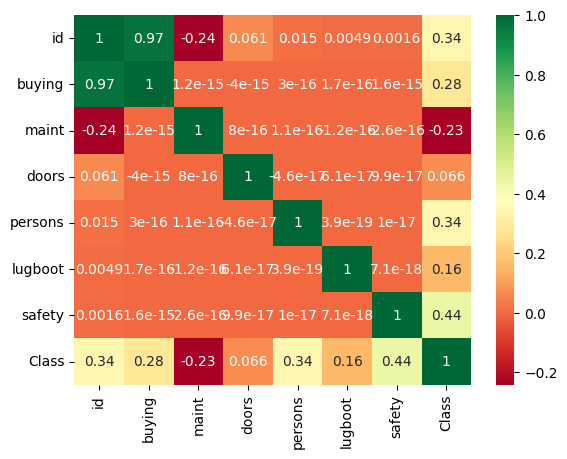

In [21]:
sns.heatmap(train.corr(),annot=True, cmap='RdYlGn')

In [22]:
train= pd.get_dummies(train, columns=['buying','maint','lugboot','safety','doors','persons'], drop_first=True)

In [23]:
train.columns

Index(['id', 'Class', 'buying_2', 'buying_3', 'buying_4', 'maint_2', 'maint_3',
       'maint_4', 'lugboot_2', 'lugboot_3', 'safety_2', 'safety_3', 'doors_2',
       'doors_3', 'doors_4', 'persons_2', 'persons_3'],
      dtype='object')

In [24]:
all_features = train[train.columns[2:]]

In [25]:
all_features.shape

(1728, 15)

In [26]:
all_features.columns

Index(['buying_2', 'buying_3', 'buying_4', 'maint_2', 'maint_3', 'maint_4',
       'lugboot_2', 'lugboot_3', 'safety_2', 'safety_3', 'doors_2', 'doors_3',
       'doors_4', 'persons_2', 'persons_3'],
      dtype='object')

In [27]:
Target_feature = train['Class']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(all_features, Target_feature, test_size=0.3, random_state= 42)

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
predict_y= model.predict(x_test)

In [64]:
accuracy_score(y_test,predict_y)

1.0

In [65]:
round(accuracy_score(y_test, predict_y)*100,2)

100.0

In [67]:
predict_y2= model.predict(x_train)

In [68]:
accuracy_score(y_train,predict_y2)

0.8362282878411911

In [69]:
round(accuracy_score(y_train, predict_y2)*100,2)

83.62